# Radio Data of Milkyway Arm Galactic Coordinate 70º 
This is the reduction pipeline of Radio Data taken by Elko Gerville-Reach on December 5th, 2023 at the Leitner Observatory on Yale campus

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# SET UNITS
freq0 = 1420.405 # rest freq in MHz
c = 299792.5 # speed of light km/s
# earth orbital speed
v_earth = 29.78
# j2000 ecliptic coordinates of sunv
lamda_sun = 247/180*np.pi 
# subtract 90 radians to obtain direction of earth's velocity
lamda_orbit = lamda_sun - 90.0/180*np.pi
# solar ecliptical latitude = 0 by definition
beta_sun = 0.0
# 
lamda_gal = 315/180*np.pi
beta_gal = 51/180*np.pi

In [3]:
# create vector pointing along earths orbit as well as pointing from earth to gal coordinate = 70º
def ecliptical_to_cartesian(beta, lamda):
    x = np.cos(beta)*np.cos(lamda)
    y = np.cos(beta)*np.sin(lamda)
    z = np.sin(beta)
    return np.hstack((x,y,z))

vector_orbit = ecliptical_to_cartesian(beta_sun, lamda_orbit)
vector_gal = ecliptical_to_cartesian(beta_gal, lamda_gal)

# component of Earth's velocity along line of sight
vel_orbit = v_earth * vector_gal @ vector_orbit

In [4]:
# load data into python
def load_data(string, N):
    data = []
    for n in range(1, N + 1):
        freq, count = np.loadtxt(string.format(n), skiprows = 1, unpack = True)
        data.append(count)
        # sum each counts along rows
        counts = np.array(data).T
    return np.array(freq), np.sum(counts, axis = 1)

freq, counts = load_data('dataradio/gal_lon_70_2_000{}.txt', 5)

In [5]:
# compute doppler velocity
vel = c*(freq0 - freq)/freq0 - vel_orbit

In [6]:
# plot spectrum for analysis
def lineplot(x, y):
    %matplotlib inline
    plt.figure(figsize = (13,5))
    plt.rcParams['font.family'] = 'serif'
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', length = 4, direction = 'in', top = True, right = True)
    plt.rcParams['axes.linewidth'] = 1    
    # plot
    plt.plot(x, y, color = 'darkslateblue', label = 'Gal longitude 70º')
    plt.xlim(-195,310)
    plt.xlabel('Velocity LSR [km/s]')
    plt.ylabel(r'$\Phi$ [arbitrary]')
    plt.legend()
    plt.show()

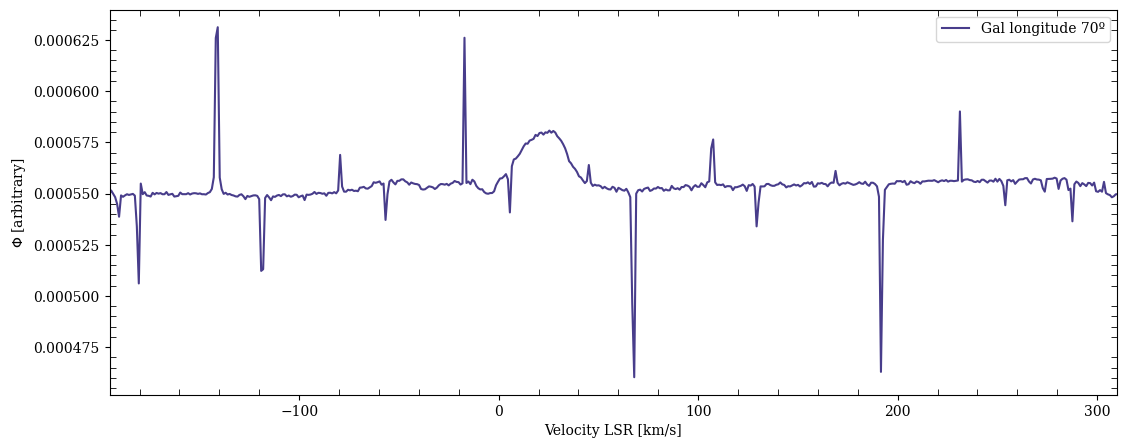

In [7]:
lineplot(vel, counts)

In [8]:
# replace discontinuities with mean
counts_mask = counts < 0.0005481
counts_corr = counts
counts_corr[counts_mask] = np.mean(counts)

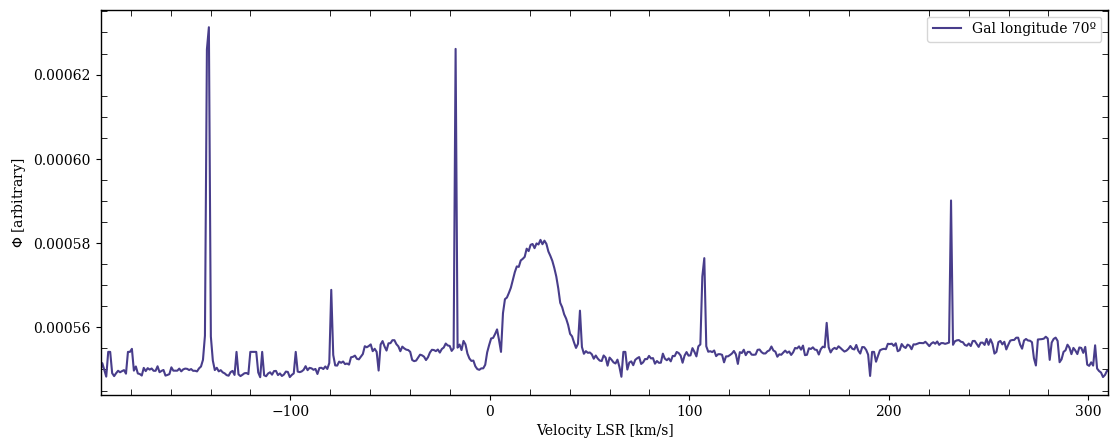

In [9]:
lineplot(vel, counts_corr)

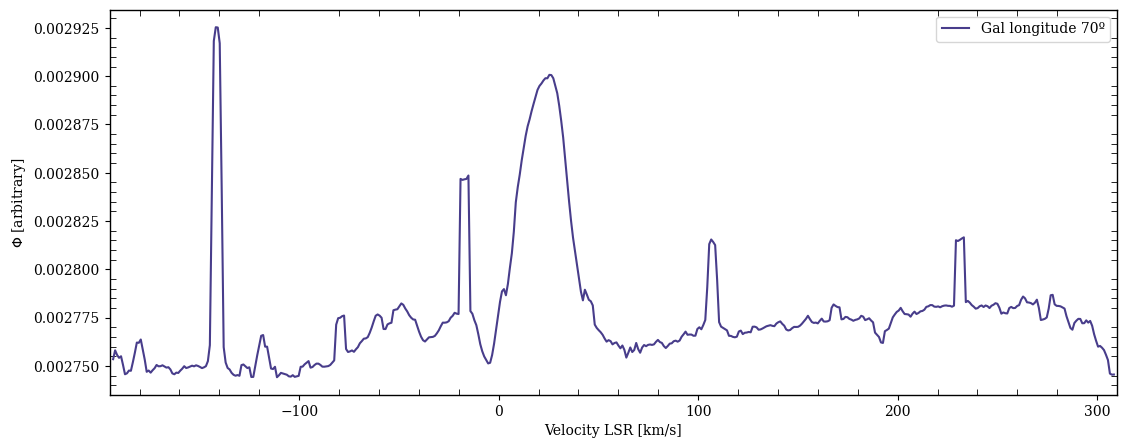

In [10]:
# apply boxcar smoothing
counts_ave = np.convolve(counts_corr, np.ones(5), 'valid')
lineplot(vel[2:-2], counts_ave)

In [12]:
# output spectrum as csv
np.savetxt('frequency.csv', np.transpose([vel[2:-2], counts_ave]), delimiter = ',')